**SYPA: Fundamental Analysis of Foreign Direct Investment** <br>
*4_Model_Selection_Tree_Based* <br>
Harvard SYPA <br>
User: Jake Schneider <br>
Date Created: February 29, 2020 <br>
Date Updated: March 1, 2020

----

**Model Selection Strategy** <br>
1. Lasso <br>
2. Random Forest <br>
3. Neural Networks

**Load Packages**

In [1]:
#Import libraries
import sys
import pandas as pd
from datetime import date, datetime, time, timedelta
import pendulum
import json
import requests
import numpy as np
import math

from scitime import Estimator 

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks', context='talk')

from matplotlib.offsetbox import AnchoredText
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
import pydot

import pickle

import statsmodels.formula.api as sm
from pprint import pprint

import warnings
import itertools

import missingno as msno

from flask import jsonify, make_response

from varname import varname

from matplotlib.backends.backend_pdf import PdfPages
from fpdf import FPDF
from PIL import Image, ImageDraw, ImageFont

----

**Load Data**

In [2]:
# Load Data

final_df = pd.read_csv('../../2_Inputs/Final/final_df.csv')
final_df = final_df.drop(["Unnamed: 0"], axis = 1)
final_df.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1960.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,74.856875,4.1602,276087.2,13.9,32.446,7.45,2.798308,15.06,-0.199767,1960.0
1,Afghanistan,1961.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,74.856875,7.6538,195999.6,13.9,32.962,7.45,2.808131,15.06,-0.199767,1961.0
2,Afghanistan,1962.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,71.941730,5.2414,-20000.0,13.9,33.471,7.45,2.804113,15.06,-0.199767,1962.0
3,Afghanistan,1963.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,54.693568,7.0762,278921.8,13.9,33.971,7.45,2.786171,15.06,-0.193007,1963.0
4,Afghanistan,1964.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.874157,6.8932,195999.6,13.9,34.463,7.45,2.754223,15.06,-0.193007,1964.0


In [3]:
# Load In Sample

in_sample = pd.read_csv('../../2_Inputs/Final/in_sample.csv')
in_sample = in_sample.drop(["Unnamed: 0"], axis = 1)
in_sample.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,1970.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.003300,8.3546,-23616.0,43.52,37.409,7.45,2.631613,29.48,-0.979531,1970.0
1,Afghanistan,1971.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,78.201934,8.5824,-22903.2,43.88,37.930,7.45,2.635235,29.68,-0.956633,1971.0
2,Afghanistan,1972.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,72.199611,8.7142,-20000.0,26.32,38.461,7.45,2.627456,26.70,-1.043920,1972.0
3,Afghanistan,1973.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,69.824106,6.7992,-14881.2,35.16,39.003,7.45,2.609505,27.00,-0.792020,1973.0
4,Afghanistan,1976.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,77.278710,4.2436,-261777.8,38.10,40.715,7.45,2.558353,28.06,-0.555133,1976.0


In [4]:
# Load Lock Box

lock_box = pd.read_csv('../../2_Inputs/Final/lock_box.csv')
lock_box = lock_box.drop(["Unnamed: 0"], axis = 1)
lock_box.head()

,country,date,code,iso2Code,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,...,Ratio.of.female.to.male.labor.force.participation.rate......modeled.ILO.estimate.,Unemployment..total....of.total.labor.force...modeled.ILO.estimate.,Net.migration,Prevalence.of.undernourishment....of.population.,Life.expectancy.at.birth..total..years.,Fertility.rate..total..births.per.woman.,Population.ages.65.and.above....of.total.population.,Unmet.need.for.contraception....of.married.women.ages.15.49.,Voice.and.Accountability..Estimate.y,year
0,Afghanistan,2015.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,57.110746,1.679,-16498.2,28.60,63.3770,4.9760,2.478662,24.50,-1.117563,2015.0
1,Afghanistan,2016.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,58.104539,1.634,-16498.2,29.50,63.7630,4.8000,2.519923,25.64,-1.039843,2016.0
2,Afghanistan,2017.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.008129,1.559,-314602.0,29.80,64.1300,4.6330,2.554251,22.98,-0.992470,2017.0
3,Afghanistan,2018.0,AFG,AF,South Asia,South Asia,Low income,IDA,Kabul,69.1761,...,59.244647,1.542,-32328.2,27.96,63.3522,4.9862,2.584927,25.86,-0.994720,2018.0
4,Albania,2015.0,ALB,AL,Europe & Central Asia,Europe & Central Asia (excluding high income),Upper middle income,IBRD,Tirane,19.8172,...,73.166459,17.080,-131596.4,6.00,78.0250,1.6770,12.626548,17.16,0.157149,2015.0


In [36]:
# Load Validation Table

results = pd.read_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table.csv')
results = results.drop(["Unnamed: 0"], axis = 1)
results.head()

,Model Name,Model Type,Minimum RMSE,Variables
0,Linear Regression,Linear Model,225737.44,2306
1,Ridge Regression,Linear Model,1320499.00,2304
2,Lasso Regression,Linear Model,35.20,885


In [6]:
# Load Coeficients List

coefs = pd.read_csv('../../3_Outputs/Model Selection/Lasso Regression/lasso_optimum_coefficients.csv')
coefs.head()
coefs_list = coefs["Unnamed: 0"]
print(coefs_list[0:5])

0    Agriculture, forestry, and fishing, value adde...
1    Agriculture, forestry, and fishing, value adde...
2                            Broad money (current LCU)
3         Central government debt, total (current LCU)
4                Changes in inventories (constant LCU)
Name: Unnamed: 0, dtype: object


----

**Prerequisites**

In [7]:
# Create Xs and Y

Xs = in_sample.drop(in_sample[['country', 'date', 'code', 'iso2Code', 'region', 'adminregion',
                      'incomeLevel', 'lendingType', 'capitalCity',
                      'Foreign direct investment, net inflows (% of GDP)']], axis = 1)
y = in_sample['Foreign direct investment, net inflows (% of GDP)'].values.reshape(-1,1)

In [8]:
# View Shapes Xs

print("Xs:", Xs.shape)
print("Y:", y.shape)

Xs: (6626, 2306)
Y: (6626, 1)


----

**Model Selection: Tree-Based Approaches**

*Random Forest* <br>
Docs: https://www.geeksforgeeks.org/random-forest-regression-in-python/ <br>
Tuning: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [9]:
# Define Evaluate and RMSE

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    
def rmse(model, Xs, y):
    predictions = model.predict(Xs)
    value = np.sqrt(((predictions - y) ** 2).mean())
    print('RMSE:', value)
    return value

In [10]:
# Random Forest: Create Parameters

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 3)]
# Number of features to consider at every split
max_features = ['sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True]
# Create the random grid
params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(params)  



{'bootstrap': [True],
 'max_depth': [10, 40, 70, 100, None],
 'max_features': ['sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 800, 1500]}


In [11]:
## Run Random Forest: Random Search
#
## First create the base model to tune
#rf = RandomForestRegressor(random_state = 13)# Random search of parameters, using 3 fold cross validation, 
## search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, n_jobs = 2)
## Fit the random search model
#rf_random.fit(Xs, y)

In [12]:
# Run Random Forest: Grid SearchCV

# Create a based model
rf = RandomForestRegressor(random_state = 13, verbose = 1)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = params,
                          cv = 3, n_jobs = 3, verbose = 3)


In [14]:
# Fit the grid search to the data

grid_search.fit(Xs, y)

Fitting 3 folds for each of 135 candidates, totalling 405 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  8.2min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 55.3min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed: 150.3min
[Parallel(n_jobs=3)]: Done 405 out of 405 | elapsed: 225.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=13,
                                             verbose=1, warm_start=False),
             iid='deprecated', n_jobs

In [15]:
# View Results

print(grid_search.best_params_)

best_grid = grid_search.best_estimator_

{'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 800}


In [16]:
# Store Best Results

best_grid

#{'bootstrap': True, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 800}

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=800, n_jobs=None, oob_score=False,
                      random_state=13, verbose=1, warm_start=False)

In [17]:
## Run evaluate
#
#grid_accuracy = evaluate(best_grid, Xs, y)

In [18]:
# Run rmse

rf_rmse = rmse(best_grid, Xs, y)
print(round(rf_rmse, 2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:    0.2s finished


RMSE: 50.88168890256609
50.88


In [19]:
# Run Random Forest Optimum

rf_optimum = best_grid.fit(Xs, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 800 out of 800 | elapsed:  1.2min finished


In [20]:
# save the model to disk

filename = '../../3_Outputs/Model Selection/Random Forest/rf_optimum_model.sav'
pickle.dump(rf_optimum, open(filename, 'wb'))

In [21]:
# load the model from disk
rf_optimum_test = pickle.load(open('../../3_Outputs/Model Selection/Random Forest/rf_optimum_model.sav', 'rb'))
print("Load rf optimum from disk")

Load rf optimum from disk


In [22]:
# Print Tree Diagram for RF Optimum

# Saving feature names for later use
feature_list = list(Xs.columns)

# Pull out one tree from the forest
tree = rf_optimum.estimators_[13]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('../../3_Outputs/Model Selection/Random Forest/RF Optimum Tree Plot.png')

In [23]:
# Print Smaller Tree

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
max_depth=3, max_features='sqrt', max_leaf_nodes=None,
max_samples=None, min_impurity_decrease=0.0,
min_impurity_split=None, min_samples_leaf=1,
min_samples_split=5, min_weight_fraction_leaf=0.0,
n_estimators=10, n_jobs=3, oob_score=False,
random_state=13, verbose=3, warm_start=False)

rf_small.fit(Xs, y)
# Extract the small tree
tree_small = rf_small.estimators_[3]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('../../3_Outputs/Model Selection/Random Forest/Small RF Optimum Tree Plot.png')

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  10 out of  10 | elapsed:    0.1s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


In [24]:
# Print Medium Tree

# Limit depth of tree to 5 levels and 12 Estimators
rf_small = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
max_depth=5, max_features='sqrt', max_leaf_nodes=None,
max_samples=None, min_impurity_decrease=0.0,
min_impurity_split=None, min_samples_leaf=1,
min_samples_split=5, min_weight_fraction_leaf=0.0,
n_estimators=12, n_jobs=3, oob_score=False,
random_state=13, verbose=3, warm_start=False)

rf_small.fit(Xs, y)
# Extract the small tree
tree_small = rf_small.estimators_[3]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('../../3_Outputs/Model Selection/Random Forest/Medium RF Optimum Tree Plot.png')

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


building tree 1 of 12building tree 2 of 12
building tree 3 of 12

building tree 4 of 12
building tree 5 of 12
building tree 6 of 12
building tree 7 of 12
building tree 8 of 12building tree 9 of 12

building tree 10 of 12
building tree 11 of 12
building tree 12 of 12


[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done  12 out of  12 | elapsed:    0.2s finished


In [25]:
# Produce Variable Importance List

# Get numerical feature importances
importances = list(rf_optimum.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: ICT goods exports (% of total goods exports) Importance: 0.0159
Variable: Insurance and financial services (% of commercial service imports) Importance: 0.0138
Variable: Primary education, teachers Importance: 0.0138
Variable: Insurance and financial services (% of service imports, BoP) Importance: 0.0137
Variable: Females..as.a.share.of.public.paid.employee.by.wage.quintile..Quintile.4. Importance: 0.0123
Variable: Insurance and financial services (% of service exports, BoP) Importance: 0.012
Variable: Tax revenue (% of GDP) Importance: 0.0113
Variable: Children out of school, primary Importance: 0.0106
Variable: Insurance and financial services (% of commercial service exports) Importance: 0.0106
Variable: Taxes on goods and services (% value added of industry and services) Importance: 0.0101
Variable: Population ages 55-59, male (% of male population) Importance: 0.0095
Variable: Revenue, excluding grants (% of GDP) Importance: 0.0091
Variable: Arable land (hectares) Impor

Variable: Unemployment with intermediate education (% of total labor force with intermediate education) Importance: 0.0
Variable: Unemployment with intermediate education, female (% of female labor force with intermediate education) Importance: 0.0
Variable: Unemployment with intermediate education, male (% of male labor force with intermediate education) Importance: 0.0
Variable: Unemployment, female (% of female labor force) (national estimate) Importance: 0.0
Variable: Unemployment, male (% of male labor force) (modeled ILO estimate) Importance: 0.0
Variable: Unemployment, male (% of male labor force) (national estimate) Importance: 0.0
Variable: Unemployment, total (% of total labor force) (modeled ILO estimate) Importance: 0.0
Variable: Unemployment, total (% of total labor force) (national estimate) Importance: 0.0
Variable: Unemployment, youth female (% of female labor force ages 15-24) (modeled ILO estimate) Importance: 0.0
Variable: Unemployment, youth male (% of male labor fo

In [26]:
# Create Dataframe of variables and importances

variable_importance_df = pd.DataFrame(columns=['Variable', 'Importance'])

for feature, importance in zip(feature_list, importances):
    row = pd.DataFrame({'Variable': feature, "Importance": [importance]})
    variable_importance_df = variable_importance_df.append(row)
    
variable_importance_df = variable_importance_df.sort_values(by=['Importance'], ascending = False)
variable_importance_df = variable_importance_df.reset_index(drop=True)
variable_importance_df.to_csv('../../3_Outputs/Model Selection/Random Forest/RF Variable Importance.csv')
variable_importance_df.head()

,Variable,Importance
0,ICT goods exports (% of total goods exports),0.015866
1,"Primary education, teachers",0.013822
2,Insurance and financial services (% of commerc...,0.013779
3,Insurance and financial services (% of service...,0.013741
4,Females..as.a.share.of.public.paid.employee.by...,0.012300


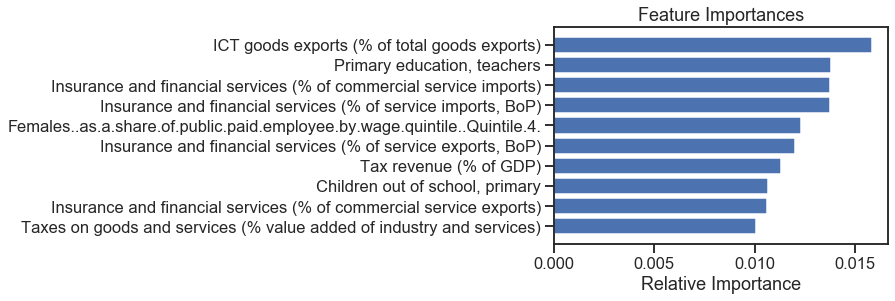

In [27]:
# Feature Importance Chart

features = Xs.columns
importances = rf_optimum.feature_importances_
indices = np.argsort(-importances)
indices = indices[0:10]

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.gca().invert_yaxis()
plt.xlabel('Relative Importance')
plt.savefig('../../3_Outputs/Model Selection/Random Forest/RF Variable Importance.jpg', bbox_inches = 'tight')
plt.show()

*Run Model with Features List Selected by Lasso*

In [28]:
## Run Model on Features Selected by Lasso
#
#grid_search.fit(Xs[columnscolumns.names == coefs_list], y)

In [29]:
## Create best grid
#
#best_grid_coefs = grid_search.best_estimator_

In [30]:
## Run rmse
#
#rf_rmse_coefs = rmse(best_grid_coefs, Xs[Xs.columns.names == coefs_list], y)
#print(round(rf_rmse_coefs, 2))

In [31]:
## Run Random Forest Optimum
#
#rf_regularized = best_grid_coefs.fit(Xs[Xs.columns.names == coefs_list], y)

In [32]:
## save the model to disk
#
#filename = '../../3_Outputs/Model Selection/Random Forest/rf_regularized_model.sav'
#pickle.dump(rf_regularized, open(filename, 'wb'))

*Run Model Fitted Specifically for Latitude, Longitude and Year* <br>
Docs: https://stackoverflow.com/questions/42427437/make-randomforestclassifier-pick-a-variable-for-sure-during-training

In [33]:
## Create a class for RF with specific inputs
#
#class FixedFeatureRF:
#    def __init__(self, n_estimators=10, random_state=None):
#        self.n_estimators = n_estimators
#
#        if random_state is None:
#            self.random_state = np.random.RandomState()
#
#    def fit(self, X, y, feats_fixed=None, max_features=None, bootstrap_frac=0.8):
#        """
#        feats_fixed: indices of features (columns of X) to be 
#                     always used to train each estimator
#
#        max_features: number of features that each estimator will use,
#                      including the fixed features.
#
#        bootstrap_frac: size of bootstrap sample that each estimator will use.
#        """
#        self.estimators = []
#        self.feats_used = []
#        self.n_classes  = np.unique(y).shape[0]
#
#        if feats_fixed is None:
#            feats_fixed = []
#        if max_features is None:
#            max_features = X.shape[1]
#
#        n_samples = X.shape[0]
#        n_bs = int(bootstrap_frac*n_samples)
#
#        feats_fixed = list(feats_fixed)
#        feats_all   = range(X.shape[1])
#
#        random_choice_size = max_features - len(feats_fixed)
#
#        feats_choosable = set(feats_all).difference(set(feats_fixed))
#        feats_choosable = np.array(list(feats_choosable))
#
#        for i in range(self.n_estimators):
#            chosen = self.random_state.choice(feats_choosable,
#                                              size=random_choice_size,
#                                              replace=False)
#            feats = feats_fixed + list(chosen)
#            self.feats_used.append(feats)
#
#            bs_sample = self.random_state.choice(n_samples,
#                                                 size=n_bs,
#                                                 replace=True)
#
#            dtc = DecisionTreeRegressor(random_state=self.random_state)
#            dtc.fit(X[bs_sample][:,feats], y[bs_sample])
#            self.estimators.append(dtc)
#
#    def predict_proba(self, X):
#        out = np.zeros((X.shape[0], self.n_classes))
#        for i in range(self.n_estimators):
#            out += self.estimators[i].predict_proba(X[:,self.feats_used[i]])
#        return out / self.n_estimators
#
#    def predict(self, X):
#        return self.predict_proba(X).argmax(axis=1)
#
#    def score(self, X, y):
#        return np.sqrt(((self.predict(X) - y)**2).mean())

In [34]:
#rs = np.random.RandomState(13)
#
#print("n_features =", Xs.shape[1])
#
#fixed = [0,1,2314]
#maxf  = 30
#
#rf_weight = FixedFeatureRF(n_estimators=1000)
#rf_weight.fit(Xs, y, feats_fixed=fixed, max_features=maxf)
#
#for feats in rf_weight.feats_used:
#    assert len(feats) == maxf
#    for f in fixed:
#        assert f in feats
#
#print(rf_weight.score(Xs, y))

In [37]:
# Store Results

rf_results = pd.DataFrame({'Model Name': 'Random Forest', 
                    'Model Type': 'Tree-Based', 
                    #'Accuracy': [round(cv_accuracy_ridge.max(), 2)],
                    'Minimum RMSE': [round(rf_rmse, 2)], 
                    #'Maximum R2': [np.max(ridge_r2)], 
                    'Variables': [len(Xs.columns) - 3]})

results = results.append(rf_results).reset_index(drop=True)
print("\nResults Dataframe:\n", results)

results.to_csv('../../3_Outputs/Model Selection/Validation Table/Validation Table 2.csv')


Results Dataframe:
           Model Name    Model Type  Minimum RMSE  Variables
0  Linear Regression  Linear Model     225737.44       2306
1   Ridge Regression  Linear Model    1320499.00       2304
2   Lasso Regression  Linear Model         35.20        885
3      Random Forest    Tree-Based         50.88       2303
